In [63]:
# Initialization
!pip install playwright
!playwright install

from playwright.async_api import async_playwright
import re
import matplotlib.pyplot as plt

The total price of the wishlist is: $1174.01


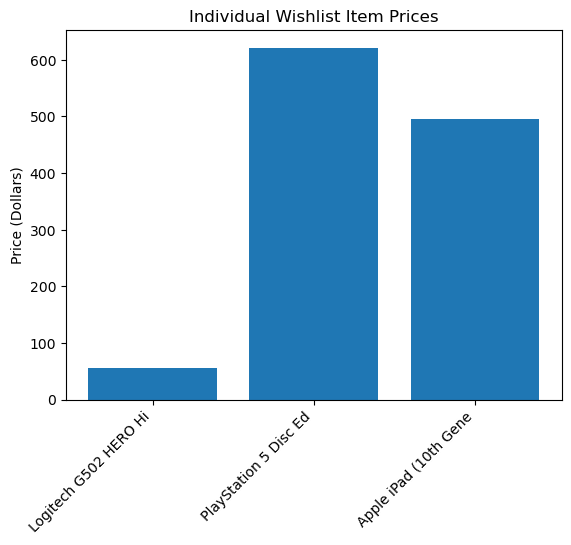

In [64]:
# Initialization
total_price = 0
prices = []
titles = []
tax_rate = 1.13 # enter your local tax rate, HST/GST

async def scrape(url):
    async with async_playwright() as playwright:

        # Initialization
        browser = await playwright.chromium.launch()
        page = await browser.new_page()

        # Input the desired Amazon url 
        await page.goto(url)
        
        # find the dollar amount price, while removing whitespace using filter() 
        await page.wait_for_selector('.a-price-whole')
        dollar = await page.inner_text('.a-price-whole')
        dollar = ''.join(filter(str.isdigit, str(dollar))) # filter for digits only

        # find the fraction price
        await page.wait_for_selector('.a-price-fraction')
        fraction = await page.inner_text('.a-price-fraction')

        # find the product title
        await page.wait_for_selector("span#productTitle")
        title = await page.locator("span#productTitle").inner_text()
        
        # combine the dollar amount and fraction together
        price = dollar + '.' + fraction

        # convert the string into a float, while factoring in taxes
        price = float(price) * tax_rate

        data = [title, price] # return a rounded price
        
        await browser.close()
        return data
        

# Input the list of urls which act as a wishlist
wishlist = ['https://www.amazon.ca/dp/B07GBZ4Q68',
            'https://www.amazon.ca/dp/B0CL7RQRY9',
            'https://www.amazon.ca/dp/B0BJLXTYMN']



# loops through each element in wishlist, using the each url in the scraping algorithm
for i in range(0,len(wishlist)):
    current_data = await scrape(wishlist[i])
    total_price += current_data[1]
    prices.append(current_data[1])
    titles.append((current_data[0])[0:21]) # keeping the first 20 characters for simplicity
    
    
# Output price
print('The total price of the wishlist is: $', round(total_price,2), sep='')


# output graph using matplotlib
fig, ax = plt.subplots()
ax.bar(titles, prices)

# labels 
ax.set_ylabel('Price (Dollars)')
ax.set_title('Individual Wishlist Item Prices')

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()